convolution layers: Conv2D
Pooling layers : MaxPooling2D 
one flatten layer 
one dense layer for extract features
one softmax layer for classification

In [7]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

(train_images , y_train),(test_images, y_test)= mnist.load_data()
x_train = train_images.reshape(60000,28,28,1)/ 255
x_test = test_images.reshape(10000,28,28,1)/ 255


In [8]:
import tensorflow as tf
from keras.src.models.sequential import Sequential
from keras.src.layers.core.dense import Dense
from keras.src.layers.convolutional.conv2d import Conv2D 
from keras.src.layers.activations.relu import ReLU
from keras.src.layers.activations.softmax import Softmax
from keras.src.layers.pooling.max_pooling2d import MaxPooling2D
from keras.src.layers.reshaping.flatten import Flatten

model = Sequential()
model.add(Conv2D(32,(3,3), activation ='relu', input_shape =(28,28,1)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3) ,activation ='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128, activation ='relu'))
model.add(Dense(10,activation='softmax'))


/home/melika_yazdanpanah/miniconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy',metrics =['accuracy'])
model.summary(line_length=80)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                      ┃ Output Shape             ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                 │ (None, 26, 26, 32)       │           320 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)    │ (None, 13, 13, 32)       │             0 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)                 │ (None, 11, 11, 64)       │        18,496 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)    │ (None, 5, 5, 64)         │             0 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ flatten_1 (Flatten)               │ (None, 1600)             │             0 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ dense_2 (Dense)                   │ (None, 128)              │       204,928 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ dense_3 (Dense)                   │ (None, 10)               │         1,290 │
└───────────────────────────────────┴──────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
#plot accuracy
import matplotlib.pyplot as path
import seaborn as sns

sns.set()

Epoch 1/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8984 - loss: 0.3394 - val_accuracy: 0.9853 - val_loss: 0.0512
Epoch 2/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9842 - loss: 0.0481 - val_accuracy: 0.9857 - val_loss: 0.0468
Epoch 3/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.9902 - loss: 0.0306 - val_accuracy: 0.9890 - val_loss: 0.0327
Epoch 4/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.9938 - loss: 0.0205 - val_accuracy: 0.9902 - val_loss: 0.0282
Epoch 5/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.9945 - loss: 0.0164 - val_accuracy: 0.9909 - val_loss: 0.0267
Epoch 6/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9962 - loss: 0.0120 - val_accuracy: 0.9919 - val_loss: 0.0246
Epoch 7/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9962 - loss: 0.0105 - val_accuracy: 0.9910 - val_loss: 0.0275
Epoch 8/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.9973 - loss: 0.0073 

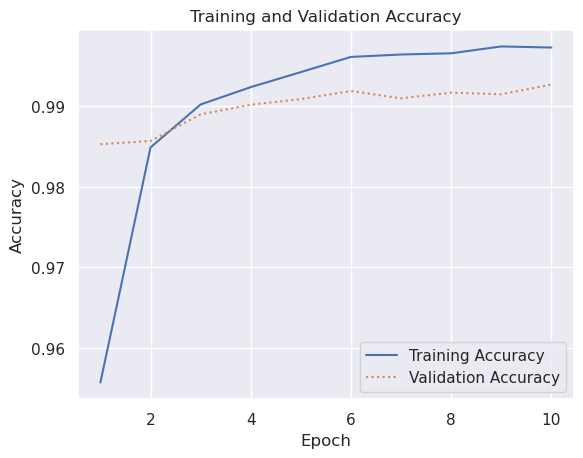

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
hist = model.fit(x_train, y_train,
 validation_data=(x_test, y_test),
 epochs=10, batch_size=50)
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')